In [7]:
import sys
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import thicket as th
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [8]:
tk = th.Thicket.from_caliperreader(glob("CombinedWeakScaling/*.cali"))

(1/2) Reading Files:   0%|          | 0/80 [00:00<?, ?it/s]

(2/2) Creating Thicket: 100%|██████████| 79/79 [00:00<00:00, 228.04it/s]
/home/ado/.local/lib/python3.10/site-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


In [6]:
tk.metadata.head()

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,
114011313,2.11.0,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p128-a4194304-sradix-irandom.cali,true,true,true,true,1729641268,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 4194304, radix, random]",c,radix,mpi,int,4,4194304,random,128,8,online
268060611,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p32-a1048576-sradix-isorted.cali,true,true,true,true,1729639962,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 1048576, radix, sorted]",c,radix,mpi,int,4,1048576,sorted,32,8,online
545364989,2.11.0,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p128-a4194304-sradix-i1perturbed.cali,true,true,true,true,1729641268,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 4194304, radix, 1perturbed]",c,radix,mpi,int,4,4194304,1perturbed,128,8,online
583879600,2.11.0,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p2-a65536-sradix-ireverse.cali,true,true,true,true,1729631073,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 65536, radix, reverse]",c,radix,mpi,int,4,65536,reverse,2,8,online
616496229,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p32-a1048576-sradix-irandom.cali,true,true,true,true,1729640022,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 1048576, radix, random]",c,radix,mpi,int,4,1048576,random,32,8,online


In [7]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

2.839 main
├─ 0.123 MPI_Comm_dup
├─ 0.782 MPI_Comm_split
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 0.054 comm
│  └─ 0.054 comm_large
│     ├─ 0.002 MPI_Allreduce
│     ├─ 0.004 MPI_Alltoall
│     ├─ 0.007 MPI_Alltoallv
│     ├─ 0.006 MPI_Bcast
│     ├─ 0.000 MPI_Gather
│     ├─ 0.026 MPI_Gatherv
│     └─ 0.007 MPI_Scatterv
├─ 0.007 comp
│  ├─ 0.007 comp_large
│  └─ 0.000 comp_small
├─ 0.001 correctness_check
└─ 0.020 data_init_runtime
   └─ 0.019 MPI_Gather

Legend (Metric: Avg time/rank Min: 0.00 Max: 2.84 indices: {'profile': 114011313})
█ 2.56 - 2.84
█ 1.99 - 2.56
█ 1.42 - 1.99
█ 0.85 - 1.42
█ 0.28 - 0.85
█ 0.00 - 0.28

name User code    ◀  Only in left graph    ▶  Only in right graph



In [9]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("algorithm")
tk.dataframe = tk.dataframe.reset_index()
tk.dataframe.head()

,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),name,num_procs,input_type,input_size,algorithm
0,"{'name': 'main', 'type': 'function'}",55479233,1.0,regionprofile,1.057360,1.057455,1.057411,8.459286,0.000000,0.990841,0.996108,0.991639,7.933114,NaN,NaN,NaN,NaN,main,8,1perturbed,262144,merge
1,"{'name': 'main', 'type': 'function'}",171408817,1.0,regionprofile,0.515263,0.518518,0.517444,4.139550,0.000001,0.466206,0.471041,0.468374,3.746992,NaN,NaN,NaN,NaN,main,8,sorted,262144,sample
2,"{'name': 'main', 'type': 'function'}",241685885,1.0,regionprofile,0.330289,0.330750,0.330520,0.661039,0.000000,0.283643,0.288084,0.285863,0.571727,NaN,NaN,NaN,NaN,main,2,reverse,65536,merge
3,"{'name': 'main', 'type': 'function'}",275162769,1.0,regionprofile,1.692176,1.708972,1.697774,54.328756,0.000028,1.580923,1.605041,1.592622,50.963892,NaN,NaN,NaN,NaN,main,32,sorted,1048576,sample
4,"{'name': 'main', 'type': 'function'}",343189636,1.0,regionprofile,0.369052,0.369344,0.369198,0.738396,0.000000,0.306860,0.351361,0.329110,0.658220,NaN,NaN,NaN,NaN,main,2,1perturbed,65536,radix


In [10]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line",
    marker='o',
    title=title,
    xlabel=xlabel,
    ylabel=ylabel,
    figsize=(15,7)
    )
    return plot

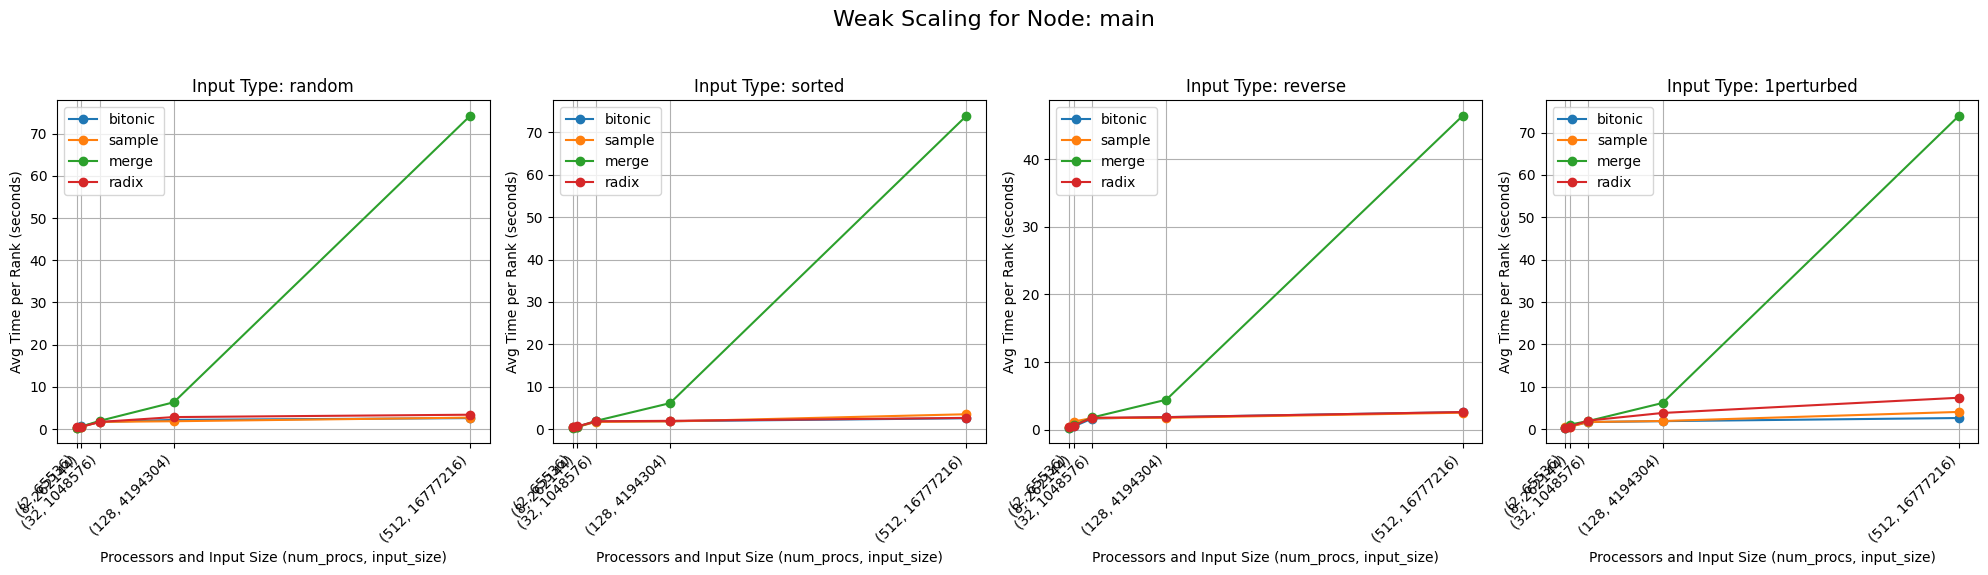

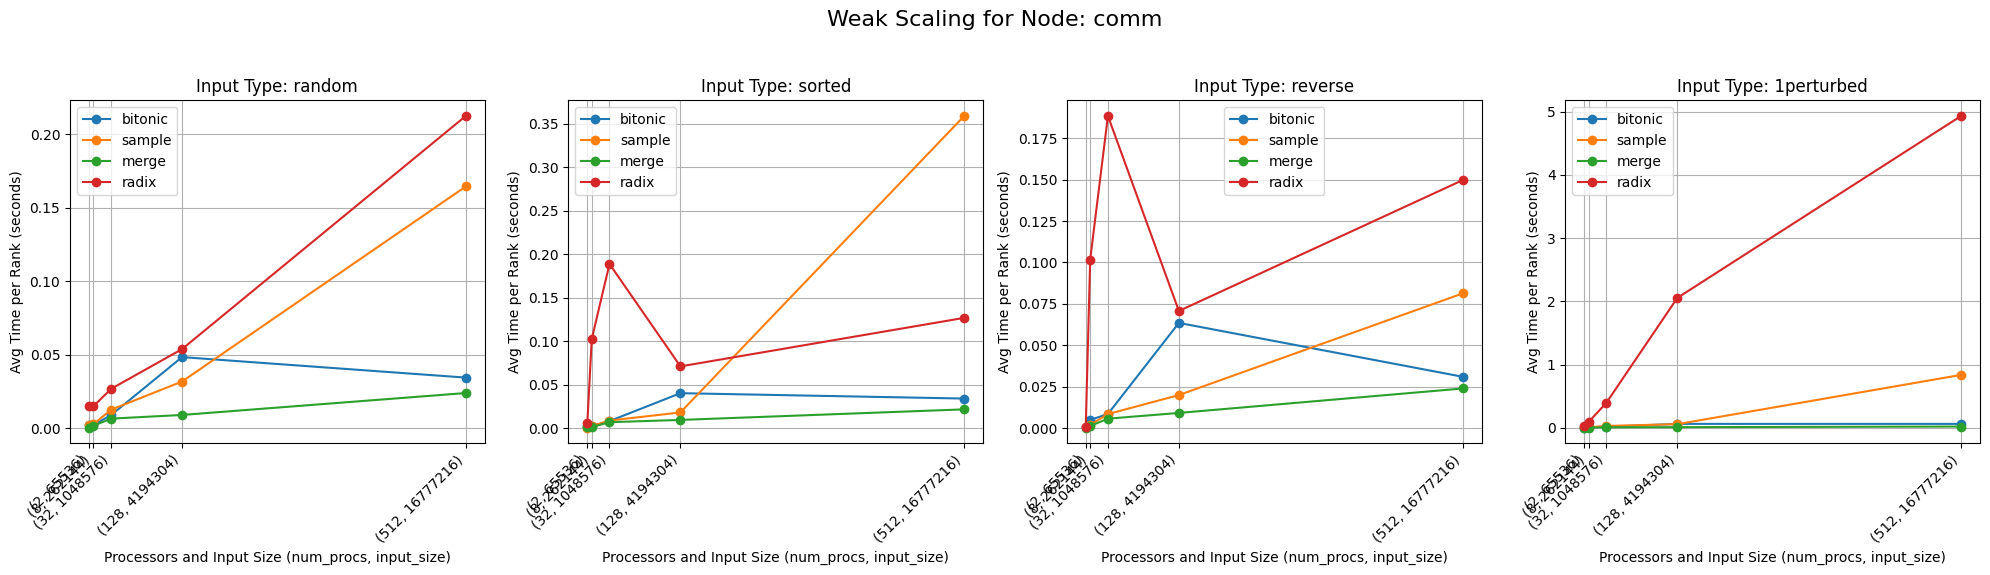

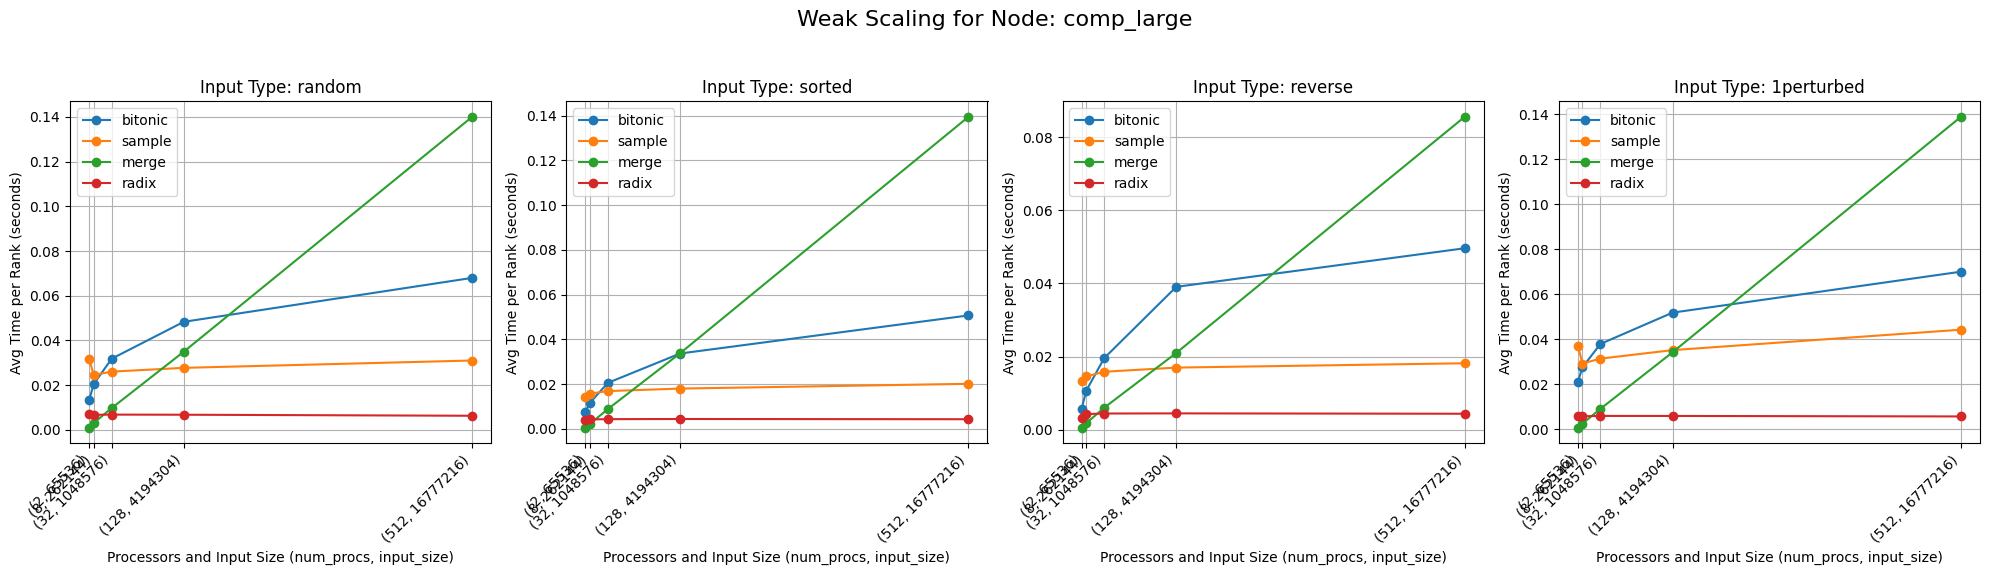

In [38]:
import os

input_sizes = [65536, 262144, 1048576, 4194304, 16777216]
input_types = ["random", "sorted", "reverse", "1perturbed"]

xlabels = ["Min Time per Rank (seconds)", "Max Time per Rank (seconds)", "Avg Time per Rank (seconds)", "Total Time (seconds)", "Variance Time per Rank (seconds)"]
time_types = ["Min time/rank", "Max time/rank", "Avg time/rank", "Total time", "Variance time/rank"]
file_output_label = ["min", "max", "avg", "total", "variance"]
type_selector = 2  # Index for 'Avg time/rank' in time_types

# Prepare output folder for plots
output_dir = '../plot_outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def plot_weak_scaling(tk, input_types):
    target_nodes = ['comp_large', 'comm', 'main']  # Specify target nodes
    sorting_algorithms = ["bitonic", "sample", "merge", "radix"]

    for node in tk.graph.traverse():

        node_name = node.frame['name']

        # Skip node names not in nodes
        if node_name not in target_nodes:
            continue

        fig, axs = plt.subplots(1, len(input_types), figsize=(20, 6))
        if len(input_types) == 1:
            axs = [axs]  # Ensure axs is iterable
        fig.suptitle(f'Weak Scaling for Node: {node_name}', fontsize=16)

        for idx, input_type in enumerate(input_types):
            ax = axs[idx]
            x_values_set = set()
            x_labels_dict = {}

            for algo in sorting_algorithms:
                # Filter the dataframe for the current node, input_type, and sorting algorithm
                data = tk.dataframe[
                    (tk.dataframe["input_type"] == input_type) &
                    (tk.dataframe['node'] == node) &
                    (tk.dataframe['algorithm'] == algo)
                ]

                if data.empty:
                    print(f"No data found for input_type={input_type}, node={node_name}, algorithm={algo}. Skipping.")
                    continue  # Skip if no data is available

                # Sort data by number of processors to ensure proper plotting
                data = data.sort_values(by="num_procs")

                # Prepare x-axis values and labels
                num_procs_list = data['num_procs'].values
                input_size_list = data['input_size'].values
                x_values_set.update(num_procs_list)
                x_labels_dict.update({num_procs: f'({int(num_procs)}, {int(input_size)})' for num_procs, input_size in zip(num_procs_list, input_size_list)})

                # Plot the data
                ax.plot(
                    num_procs_list,
                    data[time_types[type_selector]].values,
                    marker='o',
                    label=algo
                )

            if not x_values_set:
                print(f"No data found for input_type={input_type}, node={node_name}. Skipping subplot.")
                continue

            # Set x-axis labels
            x_values = sorted(x_values_set)
            x_labels = [x_labels_dict[num_procs] for num_procs in x_values]
            ax.set_xticks(x_values)
            ax.set_xticklabels(x_labels, rotation=45, ha='right')

            # Set subplot title and labels
            ax.set_title(f'Input Type: {input_type}')
            ax.set_xlabel('Processors and Input Size (num_procs, input_size)')
            ax.set_ylabel(xlabels[type_selector])
            ax.legend()
            ax.grid(True)

        # Adjust layout
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust to make space for suptitle

        # Save plot to file
        filename = f'weakscaling_{file_output_label[type_selector]}_{node_name}.png'
        filepath = os.path.join(output_dir, filename)
        plt.savefig(filepath, format='png', dpi=300)

        plt.show()

plot_weak_scaling(tk, input_types)


In [25]:
tk.dataframe = tk.dataframe.reset_index()#.set_index(["node"])
tk.dataframe

,index,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),name,num_procs,input_type,input_size
0,0,"{'name': 'main', 'type': 'function'}",597140875,1.0,regionprofile,0.409804,0.410397,0.410100,0.820201,0.000000,0.382092,0.385828,0.383960,0.767920,NaN,NaN,NaN,NaN,main,2,sorted,65536
1,1,"{'name': 'main', 'type': 'function'}",659510878,1.0,regionprofile,0.515263,0.518518,0.517444,4.139550,0.000001,0.466206,0.471041,0.468374,3.746992,NaN,NaN,NaN,NaN,main,8,sorted,262144
2,2,"{'name': 'main', 'type': 'function'}",794613659,1.0,regionprofile,1.692176,1.708972,1.697774,54.328756,0.000028,1.580923,1.605041,1.592622,50.963892,NaN,NaN,NaN,NaN,main,32,sorted,1048576
3,3,"{'name': 'main', 'type': 'function'}",903943707,1.0,regionprofile,0.524245,0.526297,0.525497,4.203976,0.000001,0.456417,0.462356,0.460760,3.686082,NaN,NaN,NaN,NaN,main,8,1perturbed,262144
4,4,"{'name': 'main', 'type': 'function'}",918256160,1.0,regionprofile,0.449364,0.449967,0.449665,0.899331,0.000000,0.382574,0.387887,0.385230,0.770461,NaN,NaN,NaN,NaN,main,2,1perturbed,65536
5,5,"{'name': 'main', 'type': 'function'}",924180576,1.0,regionprofile,0.531032,0.531088,0.531075,4.248596,0.000000,0.469810,0.474710,0.473480,3.787840,NaN,NaN,NaN,NaN,main,8,random,262144
6,6,"{'name': 'main', 'type': 'function'}",1504175327,1.0,regionprofile,1.846758,1.862570,1.853636,237.265348,0.000018,1.578377,1.651210,1.613874,206.575873,NaN,NaN,NaN,NaN,main,128,random,4194304
7,7,"{'name': 'main', 'type': 'function'}",1571601236,1.0,regionprofile,1.894397,1.911666,1.901724,243.420639,0.000017,1.605355,1.648466,1.626419,208.181635,NaN,NaN,NaN,NaN,main,128,1perturbed,4194304
8,8,"{'name': 'main', 'type': 'function'}",1899271269,1.0,regionprofile,2.678009,2.737025,2.712976,1389.043479,0.000168,1.767789,1.967588,1.853300,948.889588,NaN,NaN,NaN,NaN,main,512,random,16777216
9,9,"{'name': 'main', 'type': 'function'}",1935137930,1.0,regionprofile,1.742528,1.749762,1.746686,55.893952,0.000006,1.629747,1.642357,1.637646,52.404665,NaN,NaN,NaN,NaN,main,32,reverse,1048576
